In [7]:
import numpy as np
import pandas as pd

In [8]:
crop = pd.read_csv("asset/Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Exploring Data Set 

In [9]:
## understanding size of data set 
## 2200 rows and 8 coloumns

crop.shape

(2200, 8)

In [10]:
## Crop Information

crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
## to check we have null values or not ..

crop.isnull().sum() 

## we don't have null values in data set

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [12]:
## to check do we have duplicate values ..

crop.duplicated().sum()

## zero duplicate value

0

In [13]:
## Let's check data in terms of statistics parameters like count,mean,standard deviation,min,max,percentile ...

crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [15]:
# Correlation 

# The .corr() method in Pandas is used to compute the pairwise correlation of columns in a DataFrame, which is a measure of the linear relationship between two variables. The result is a correlation matrix, where each element shows the correlation coefficient between two columns.

# Correlation quantifies the degree to which two variables move in relation to each other. The correlation coefficient can range from

# +1: Perfect positive correlation, where if one variable increases, the other also increases proportionally.

# -1: Perfect negative correlation, where if one variable increases, the other decreases proportionally.

# 0: No correlation, where there is no linear relationship between the variables.

# Select only numeric columns
# Select only numeric columns from the DataFrame

# Select only numeric columns from the DataFrame
# This step ensures that .corr() works only on numeric data.
# It's optional here since the .corr() method itself filters non-numeric columns.
# Select only numeric columns from the DataFrame
# This step ensures that .corr() works only on numeric data.
# It's optional here since the .corr() method itself filters non-numeric columns.

# Drop non-numeric columns
numeric_data = crop.select_dtypes(include=[float, int])

# Compute correlation matrix
corr = numeric_data.corr()
corr


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

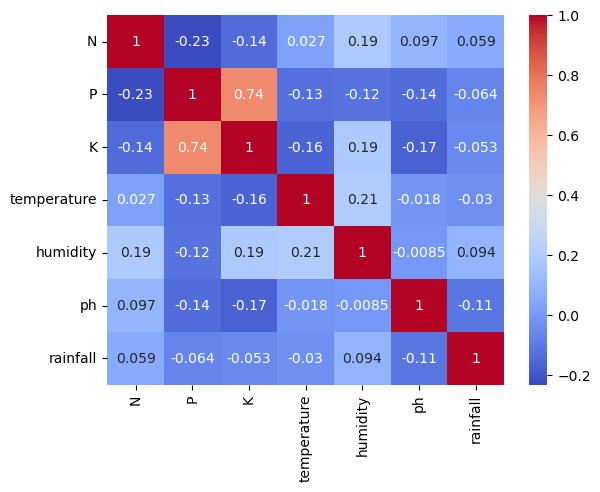

In [16]:
import seaborn as sns
sns.heatmap(corr, annot=True, cmap="coolwarm", cbar=True)

In [17]:
crop['label'].value_counts() 

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

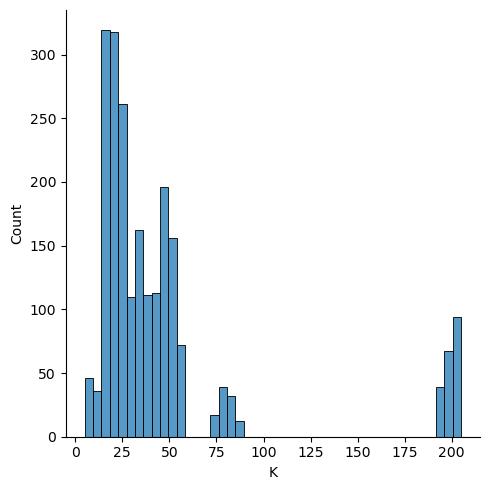

In [18]:
import matplotlib.pyplot as plt
sns.displot(crop['K'])

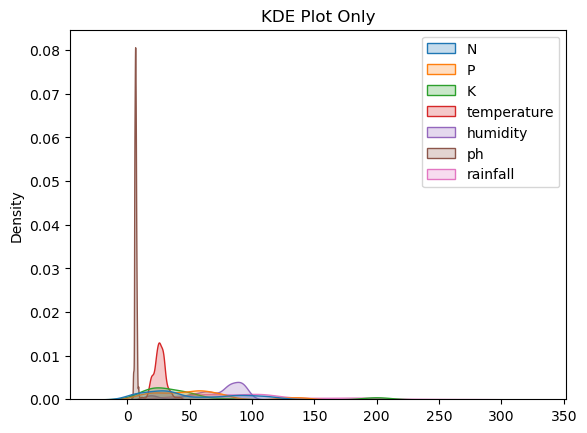

In [19]:
sns.kdeplot(data=crop, fill=True, color='purple')
plt.title("KDE Plot Only")
#A Kernel Density Estimate (KDE) plot is a smooth, continuous approximation of a distribution based on the data. It estimates the probability density function (PDF) of a variable, allowing you to visualize the underlying distribution of the data in a smooth way without the "blockiness" of histograms.

#Kernel Function:
#KDE uses a kernel (typically Gaussian, i.e., a bell curve) to estimate the density at each point in the dataset.
#The kernel is placed over each data point, and the density is calculated as a sum of all these individual kernels.
#Advantages over Histograms:
#Smoothness: Unlike histograms, which can look jagged due to the choice of bin sizes, KDE plots provide a smooth estimate of the #distribution.
#No Binning: KDE does not require the user to specify bin sizes as in histograms, which can sometimes be misleading depending on how bins are chosen.
#Continuous: KDE gives a continuous curve, making it easier to understand the distribution shape over the entire range of the data.
data = np.random.normal(loc=0, scale=1, size=1000)

# Show the plot
plt.show()

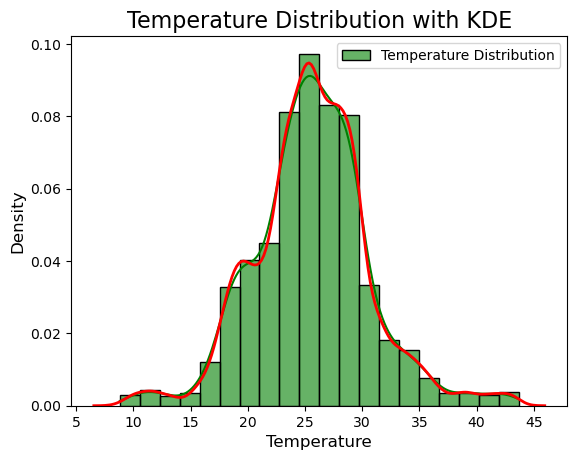

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your 'crop' DataFrame is already defined and contains relevant columns
# For example, let's visualize the distribution of 'temperature'

# Create a histogram and KDE plot for 'temperature'
sns.histplot(crop['temperature'], kde=True, color='green', bins=20, stat='density', label='Temperature Distribution', alpha=0.6)

# Optionally, customize the KDE with additional options
sns.kdeplot(crop['temperature'], color='red', linewidth=2, bw_adjust=0.7)  # Adjusting the bandwidth for smoother curve

# Set plot title and labels
plt.title("Temperature Distribution with KDE", fontsize=16)
plt.xlabel("Temperature", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Show legend
plt.legend()

# Display the plot
plt.show()


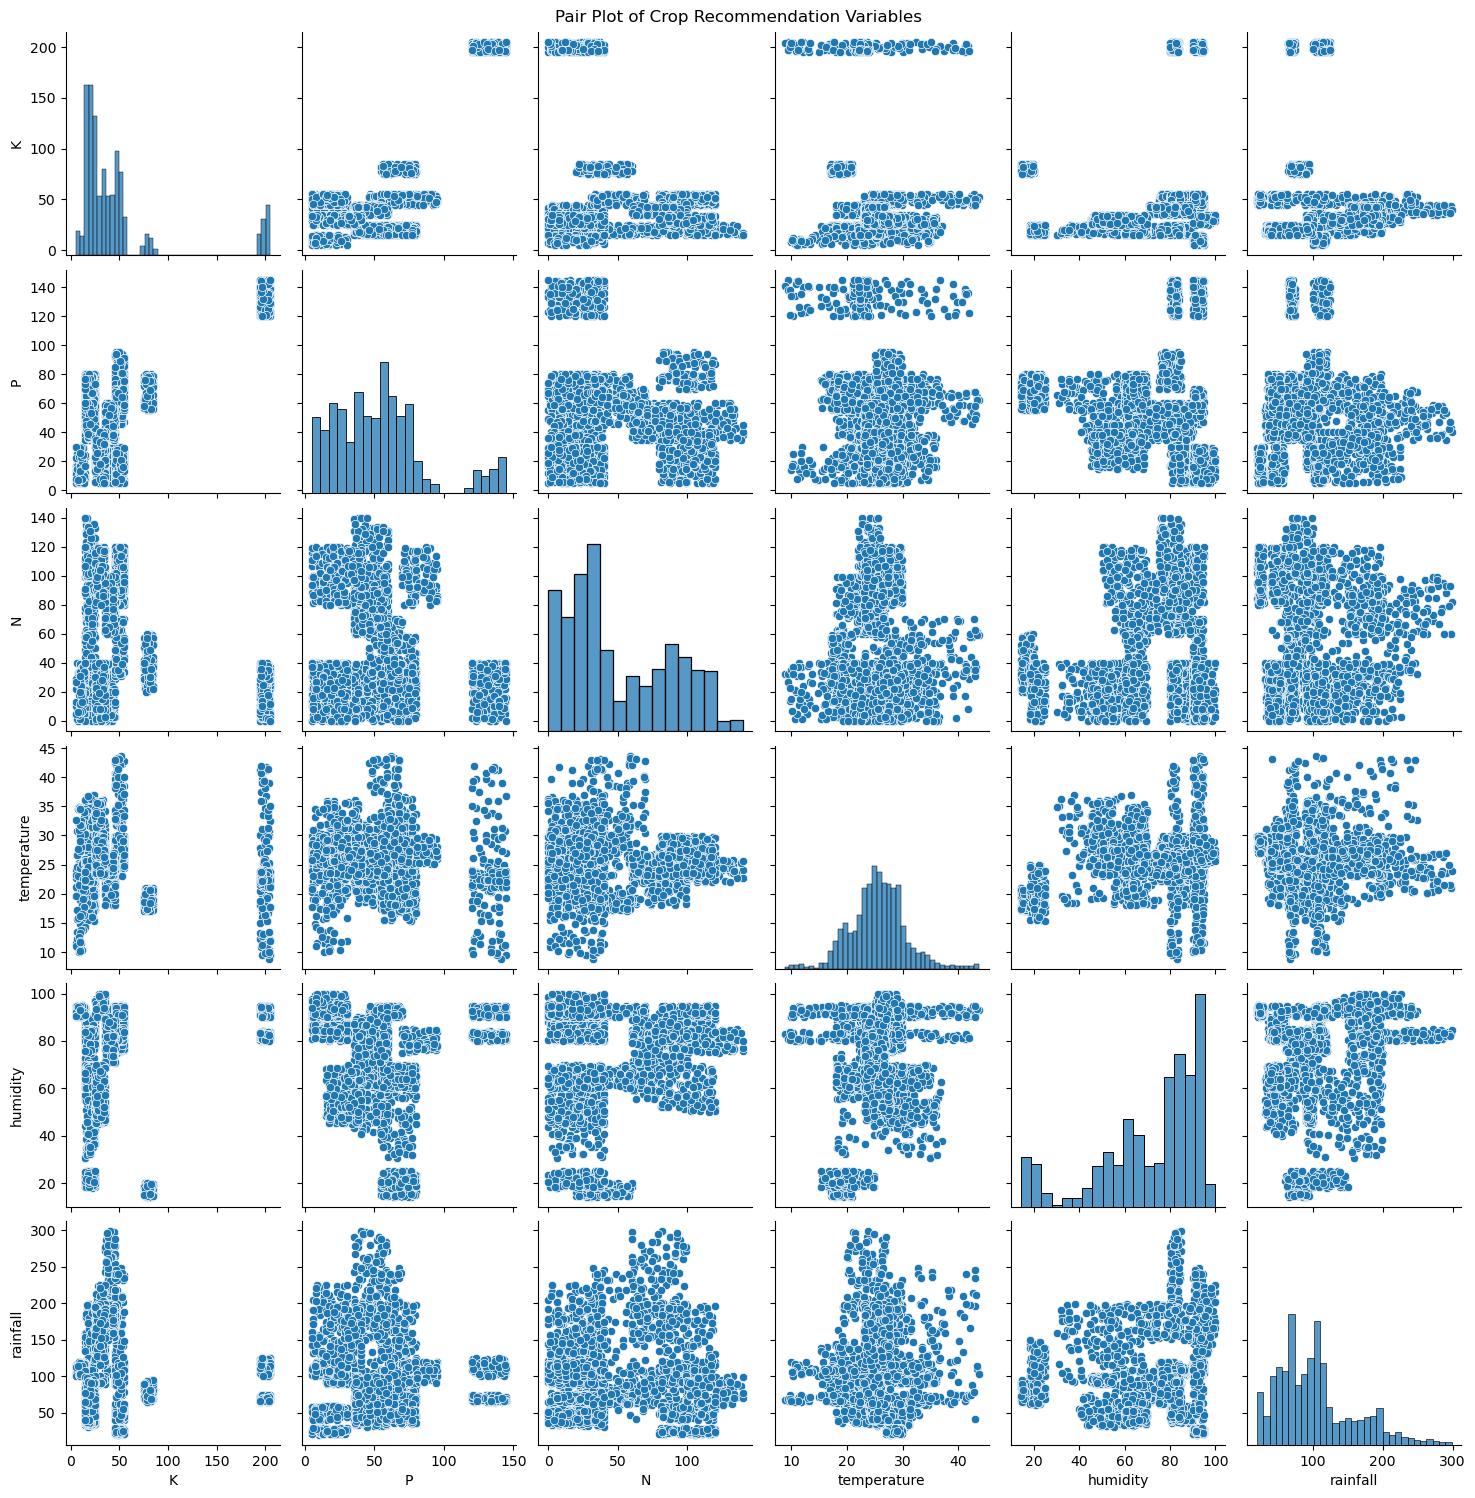

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `crop` is your DataFrame
sns.pairplot(crop[['K', 'P', 'N', 'temperature', 'humidity', 'rainfall']])
plt.suptitle('Pair Plot of Crop Recommendation Variables', y=1)
plt.show()

## Use a pair plot to see how different variables correlate with each other. For instance, you might observe how temperature correlates with humidity or how potassium levels correlate with nitrogen levels.




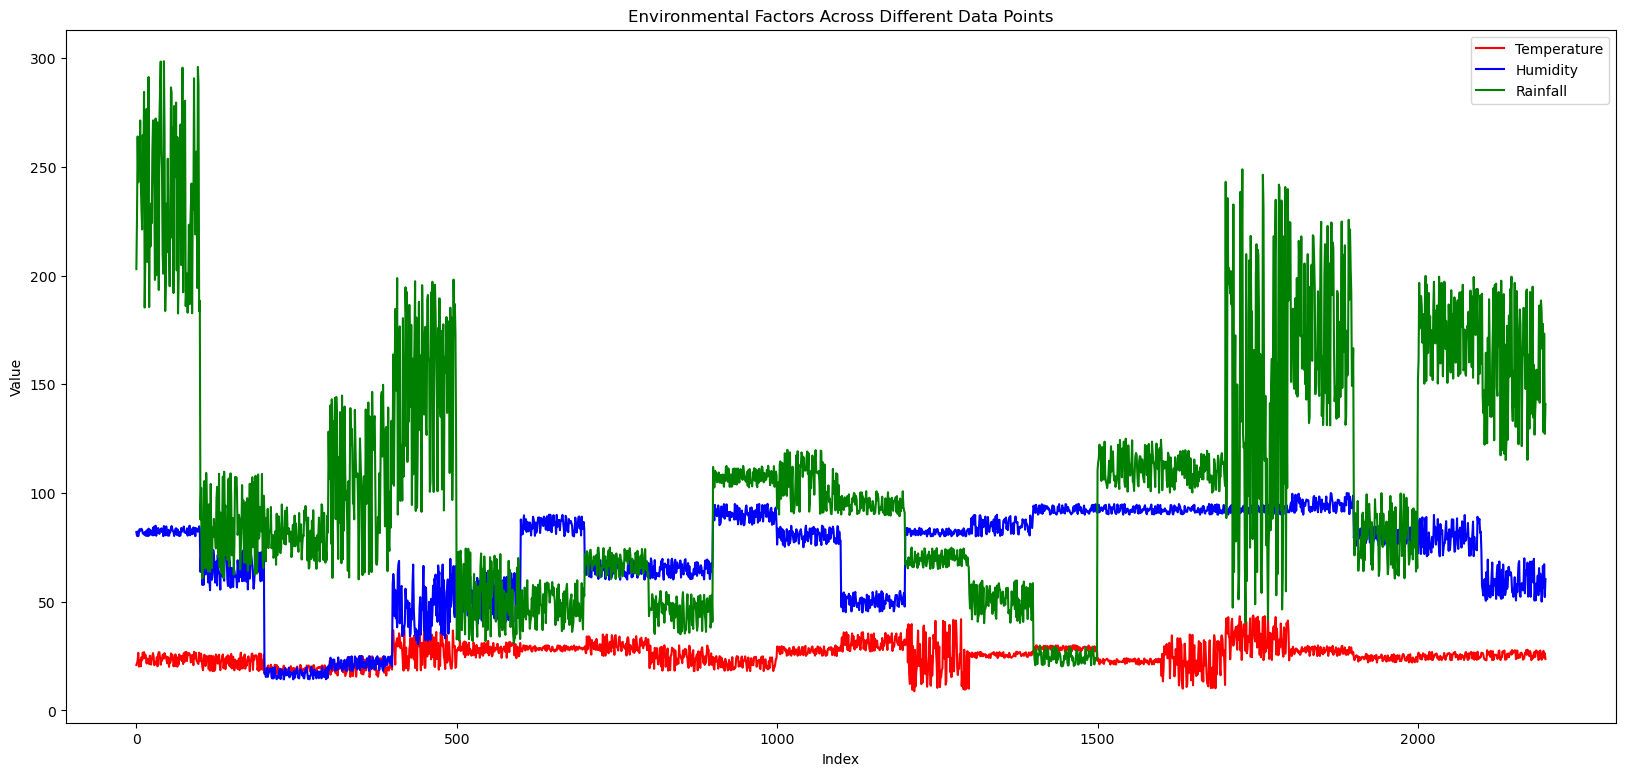

In [22]:
plt.figure(figsize=(20, 9))

plt.plot(crop['temperature'], label='Temperature', color='red')
plt.plot(crop['humidity'], label='Humidity', color='blue')
plt.plot(crop['rainfall'], label='Rainfall', color='green')

plt.title('Environmental Factors Across Different Data Points')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


In [24]:
crop = pd.read_csv("asset/Crop_recommendation.csv")
crop.head()
# Normalize dictionary keys for consistency
crop_dictionary = {
    'rice': 1, 'maize': 2, 'jute': 3, 'cotton': 4, 'coconut': 5, 'papaya': 6, 'orange': 7,
    'apple': 8, 'muskmelon': 9, 'watermelon': 10, 'grapes': 11, 'mango': 12, 'banana': 13,
    'pomegranate': 14, 'lentil': 15, 'blackgram': 16, 'mungbean': 17, 'mothbeans': 18,
    'pigeonpeas': 19, 'kidneybeans': 20, 'chickpea': 21, 'coffee': 22
}
crop['Crop_NumericalValues'] = crop['label'].map(crop_dictionary)


In [25]:
crop['Crop_NumericalValues'].value_counts()

Crop_NumericalValues
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [26]:
crop = crop.drop(columns=['label'])
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,Crop_NumericalValues
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [27]:
x = crop.drop('Crop_NumericalValues',axis=1)
y= crop['Crop_NumericalValues']

In [28]:
x.shape

(2200, 7)

In [29]:
y.shape

(2200,)

In [ ]:
#
#X: Features (independent variables).
#y: Target variable (dependent variable).
#test_size (optional): Fraction of the dataset to be used for testing (e.g., 0.25 means 25% for testing and 75% for training).
#train_size (optional): Fraction of the dataset to be used for training (can be used instead of test_size).
#random_state (optional): Ensures reproducibility by controlling the random seed.
#shuffle (optional, default=True): Shuffles the data before splitting.
#stratify (optional): Ensures the same class distribution in train and test sets (used for classification tasks)
#
#Returns:
#X_train: Training set of features.
#X_test: Test set of features.
#y_train: Training set of labels.
#y_test: Test set of labels.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=42)

In [32]:
x_train.shape

(1760, 7)

In [33]:
x_test.shape

(440, 7)

In [34]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [35]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler in sklearn is a feature scaling method provided by the sklearn.preprocessing module. It scales and translates each feature individually such that it is in the given range, typically 
# [0,1]
# This is particularly useful when features have varying scales but need to be normalized to the same scale for certain machine learning models to perform better.



In [36]:
ms = MinMaxScaler()
ms.fit(x_train)
x_train=ms.transform(x_train)
x_test=ms.transform(x_test)

In [37]:
x_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

Standarization

In [38]:
from sklearn.preprocessing import StandardScaler
stsc = StandardScaler()
stsc.fit(x_train)
x_train=stsc.transform(x_train)
x_test=stsc.transform(x_test)

In [39]:
x_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

Training Models

1.1 Supervised Learning
Definition: The model is trained on labeled data (i.e., each input has a corresponding output).

Objective: Learn the mapping between inputs (X) and outputs (y) to make predictions on new data.
Examples:
Regression: Predict continuous values (e.g., house prices).

Classification: Predict discrete categories (e.g., spam detection).

Steps to Train:
Prepare the data: Split into training and testing sets. Optionally, normalize or standardize features.
Choose an algorithm: Common algorithms include:

Linear Regression, Decision Trees, Random Forest, Support Vector Machines (SVM), Neural Networks.

Train the model: Fit the algorithm to the training data.

Evaluate performance: Use metrics like Mean Squared Error (MSE) for regression or accuracy and F1-score for classification.

Tune hyperparameters: Adjust model settings using techniques like Grid Search or Random Search.

1.2 Unsupervised Learning
Definition: The model is trained on unlabeled data to find hidden patterns or groupings.
Objective: Group similar instances or reduce dimensionality.
Examples:
Clustering: Group data points (e.g., customer segmentation).

Dimensionality Reduction: Reduce the number of features (e.g., PCA).

Steps to Train:
Preprocess data: Ensure features are on similar scales if needed.

Choose an algorithm: Common algorithms include:

K-Means, Hierarchical Clustering, DBSCAN, Principal Component Analysis (PCA).

Train the model: Use the algorithm to identify patterns or clusters.
Interpret results: Evaluate the clusters or transformed features using domain knowledge or visualization techniques.

1.3 Reinforcement Learning
Definition: The model learns by interacting with an environment and receiving feedback in the form of rewards or penalties.
Objective: Learn a policy that maximizes cumulative rewards.
Examples:
Robotics, Game playing (e.g., AlphaGo), Autonomous driving.
Steps to Train:
Define the environment: Use tools like OpenAI Gym for predefined environments.

Select an agent algorithm: Common algorithms include:

Q-Learning, Deep Q-Networks (DQN), Policy Gradient Methods.

Train the agent: Run multiple episodes, allowing the agent to explore and exploit the environment.
Evaluate performance: Test the agent in the environment.

The steps to train a machine learning model generally include:

2.1 Data Preparation
Collect Data: Ensure you have sufficient and relevant data.
Clean Data: Handle missing values, outliers, and noise.
Split Data:
Train set: Used for training the model.
Test set: Used for evaluating the model’s performance on unseen data.
Validation set (optional): Used for hyperparameter tuning.

2.2 Feature Engineering
Normalize or Scale Features: Use techniques like StandardScaler or MinMaxScaler.
Create New Features: Use domain knowledge to derive meaningful features.
Reduce Dimensionality: Use PCA or similar techniques to simplify the dataset.

2.3 Model Selection
Choose a model appropriate for the problem type (regression, classification, clustering, etc.).
Consider complexity, interpretability, and computational requirements.

2.4 Training
Use a dataset to fit the model to the data.
Minimize a loss function (e.g., MSE for regression or cross-entropy for classification) using optimization techniques like Gradient Descent.

2.5 Evaluation
Metrics depend on the problem type:
Regression: Mean Squared Error (MSE), R-squared.
Classification: Accuracy, Precision, Recall, F1-score, ROC-AUC.
Clustering: Silhouette Score, Davies-Bouldin Index.

2.6 Hyperparameter Tuning
Use Grid Search, Random Search, or Bayesian Optimization to optimize model hyperparameters.

2.7 Deployment
After training and testing, deploy the model to make predictions on new data.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Creating algorithm instances
algorithms_dict = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Ensure convergence
    "Gaussian Naive Bayes": GaussianNB(),
    "Support Vector Classifier": SVC(probability=True),  # Enable probability output
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Extra Trees": ExtraTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Bagging": BaggingClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Adaptive Boosting": AdaBoostClassifier(algorithm='SAMME'),  # Avoid deprecation warning
}

# Training and Evaluating
for name, algo in algorithms_dict.items():
    # Train the algorithm
    algo.fit(x_train, y_train)
    # Predict on the test set
    y_prediction = algo.predict(x_test)
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_prediction)
    print(f"{name} with accuracy of: {accuracy:.5f}\n")


Logistic Regression with accuracy of: 0.96364

Gaussian Naive Bayes with accuracy of: 0.99545

Support Vector Classifier with accuracy of: 0.96818

K-Nearest Neighbors with accuracy of: 0.95909

Decision Tree with accuracy of: 0.98409

Extra Trees with accuracy of: 0.89545

Random Forest with accuracy of: 0.99318

Bagging with accuracy of: 0.98636

Gradient Boosting with accuracy of: 0.98182

Adaptive Boosting with accuracy of: 0.14545



Aspect                     Naive Bayes                                      Random Forest
------------------------------------------------------------------------------------------------------------
Speed                      Very fast to train and predict.                  Slower to train, but fast to predict (once trained).
------------------------------------------------------------------------------------------------------------
Accuracy                   Performs well on simpler problems or smaller datasets.   High accuracy, especially for complex problems.
------------------------------------------------------------------------------------------------------------
Handling of Non-Linearity  Struggles with non-linear relationships.           Handles non-linearity well due to decision trees.
------------------------------------------------------------------------------------------------------------
Overfitting                Low risk of overfitting due to simplicity.         Less prone to overfitting, but can overfit with too many trees.
------------------------------------------------------------------------------------------------------------
Feature Correlation        Poor performance when features are correlated.     Can handle correlated features due to random feature selection.
------------------------------------------------------------------------------------------------------------
Data Preprocessing       Works well with minimal preprocessing (e.g., raw text).   Requires more preprocessing (e.g., scaling, encoding) for optimal performance.
------------------------------------------------------------------------------------------------------------
Interpretability          Highly interpretable, easy to understand.          Less interpretable due to ensemble nature (many trees).
------------------------------------------------------------------------------------------------------------
Scalability               Scales well with smaller datasets.                May require substantial computational resources for large datasets.
------------------------------------------------------------------------------------------------------------
Performance on Imbalanced Data   Struggles with imbalanced data.                   Handles imbalanced data better, especially with class weights.
------------------------------------------------------------------------------------------------------------
Computational Efficiency        Very efficient and fast.                          Computationally expensive, especially with many trees.
------------------------------------------------------------------------------------------------------------
Flexibility               Limited flexibility (based on the independence assumption). Very flexible, can capture complex interactions between features.
------------------------------------------------------------------------------------------------------------
Handling Missing Data       Naive Bayes does not handle missing data well unless features are independently missing.   Random Forest can handle missing 
data by averaging over trees.
------------------------------------------------------------------------------------------------------------
Model Tuning             Few hyperparameters (e.g., smoothing).            Multiple hyperparameters (e.g., number of trees, max depth) for optimal performance.
------------------------------------------------------------------------------------------------------------
Suitability for High-Dimensional Data   Works well with text data (high-dimensional).   Performs well with high-dimensional data but might need tuning.
------------------------------------------------------------------------------------------------------------
Feature Importance          Does not provide feature importance directly.      Can compute feature importance, which is useful for model interpretation.
------------------------------------------------------------------------------------------------------------
Use Cases             Text classification (spam filtering, sentiment analysis).   Complex classification and regression tasks, feature importance analysis, high-dimensional problems.
------------------------------------------------------------------------------------------------------------
Model Assumptions         Assumes feature independence and specific data distributions (e.g., Gaussian).   No strong assumptions, works on non-linear relationships.
------------------------------------------------------------------------------------------------------------
Robustness to Outliers      Sensitive to outliers (especially Gaussian Naive Bayes).   More robust to outliers due to random trees and majority voting.
------------------------------------------------------------------------------------------------------------
Model Complexity                 Simple and easy to implement.                     Complex, especially when dealing with many trees and hyperparameters.
------------------------------------------------------------------------------------------------------------
Training Time                    Very fast on small datasets.                      Slower training time as the number of trees increases.
------------------------------------------------------------------------------------------------------------
Memory Usage                     Low memory usage.                                 Memory-intensive due to storage of many decision trees.
------------------------------------------------------------------------------------------------------------
Handling Categorical Data        Works well with categorical data (using Multinomial/ Bernoulli variants).   Works well with categorical data and continuous features, handles mixed data types.
------------------------------------------------------------------------------------------------------------
Parallelization                 Limited parallelism (can be parallelized across classes).   Can be parallelized easily, making it efficient for large datasets.
------------------------------------------------------------------------------------------------------------
Generalization                  May generalize poorly on complex problems.         Tends to generalize well, especially with enough trees.
------------------------------------------------------------------------------------------------------------


In [76]:
ranfor = RandomForestClassifier()
ranfor.fit(x_train,y_train)
y_prediction = ranfor.predict(x_test)
accuracy_score(y_test,y_prediction)

0.9931818181818182

Crop Picker Recommendation Algorithm

In [102]:
import numpy as np

def recommendation(N, P, K, humidity, temperature, rainfall, ph):
    crop_dictionary = {
        1: 'rice', 2: 'maize', 3: 'jute', 4: 'cotton', 5: 'coconut',
        6: 'papaya', 7: 'orange', 8: 'apple', 9: 'muskmelon', 10: 'watermelon',
        11: 'grapes', 12: 'mango', 13: 'banana', 14: 'pomegranate', 15: 'lentil',
        16: 'blackgram', 17: 'mungbean', 18: 'mothbeans', 19: 'pigeonpeas',
        20: 'kidneybeans', 21: 'chickpea', 22: 'coffee'
    }

    # Prepare input for the model
    parameters = np.array([[N, P, K, humidity, temperature, rainfall, ph]])

    # Predict using the model
    prediction = ranfor.predict(parameters)

    # Get the crop name from the dictionary using the predicted crop code
    crop_code = prediction[0]
    crop_name = crop_dictionary.get(crop_code, None)

    return crop_name


In [107]:
# Example inputs
N = 30
P = 60
K = 47
humidity = 40
temperature = 30.0
rainfall = 90
ph = 20

# Call the recommendation function (assuming ranfor is trained)
predicted_crop = recommendation(N, P, K, humidity, temperature, rainfall, ph)
crop_dictionary = {
    'rice': 1, 'maize': 2, 'jute': 3, 'cotton': 4, 'coconut': 5, 
    'papaya': 6, 'orange': 7, 'apple': 8, 'muskmelon': 9, 'watermelon': 10, 
    'grapes': 11, 'mango': 12, 'banana': 13, 'pomegranate': 14, 'lentil': 15, 
    'blackgram': 16, 'mungbean': 17, 'mothbeans': 18, 'pigeonpeas': 19, 
    'kidneybeans': 20, 'chickpea': 21, 'coffee': 22
}

if predicted_crop in crop_dictionary:
    print(f" {predicted_crop.capitalize()} is a suitable crop for the environmental conditions you entered ")
else:
    print("Apologies, but we cannot recommend a crop based on the provided inputs.")


 Apple is a suitable crop for the environmental conditions you entered 
